In [1]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline     #import libraries

UsageError: unrecognized arguments: #import libraries


In [3]:
netflix=pd.read_csv('netflix daily top 10.csv') #import netflix file
netflix.head(10)

,As_of,Rank,Year_to_Date_Rank,Last_Week_Rank,Title,Type,Netflix_Exclusive,Netflix_Release_Date,Days_In_Top_10,Viewership_Score
0,01-04-2020,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,01-04-2020,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,01-04-2020,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,01-04-2020,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,01-04-2020,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,01-04-2020,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,01-04-2020,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,01-04-2020,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,01-04-2020,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,01-04-2020,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [4]:
netflix.info()  #info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As_of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year_to_Date_Rank     7100 non-null   object
 3   Last_Week_Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix_Exclusive     4599 non-null   object
 7   Netflix_Release_Date  7100 non-null   object
 8   Days_In_Top_10        7100 non-null   int64 
 9   Viewership_Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [5]:
netflix.nunique() #no of unique columns 

As_of                   710
Rank                     10
Year_to_Date_Rank        11
Last_Week_Rank           11
Title                   645
Type                      4
Netflix_Exclusive         1
Netflix_Release_Date    414
Days_In_Top_10          428
Viewership_Score        779
dtype: int64

In [6]:
netflix.Type.unique()  #unique values from column Type

array(['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert/Perf…'],
      dtype=object)

In [7]:
netflix.duplicated().dropna().sum()  #drop duplicates

0

In [8]:
netflix.isnull().any() # Null values in columns

As_of                   False
Rank                    False
Year_to_Date_Rank       False
Last_Week_Rank          False
Title                   False
Type                    False
Netflix_Exclusive        True
Netflix_Release_Date    False
Days_In_Top_10          False
Viewership_Score        False
dtype: bool

In [9]:
netflix.isnull().sum() #Total null values in columns

As_of                      0
Rank                       0
Year_to_Date_Rank          0
Last_Week_Rank             0
Title                      0
Type                       0
Netflix_Exclusive       2501
Netflix_Release_Date       0
Days_In_Top_10             0
Viewership_Score           0
dtype: int64

In [10]:
netflix.Netflix_Exclusive.replace("",np.nan,inplace=True)  #replace empty values in Netflix-Exclusive into NAN

In [11]:
netflix.Last_Week_Rank .replace("-",np.nan,inplace=True)  #replace - values in Last-week-rank into NAN

In [12]:
netflix.head() #head 5 rows 

,As_of,Rank,Year_to_Date_Rank,Last_Week_Rank,Title,Type,Netflix_Exclusive,Netflix_Release_Date,Days_In_Top_10,Viewership_Score
0,01-04-2020,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,01-04-2020,2,2,NaN,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,01-04-2020,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,01-04-2020,4,4,NaN,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,01-04-2020,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


<Axes: xlabel='Type', ylabel='count'>

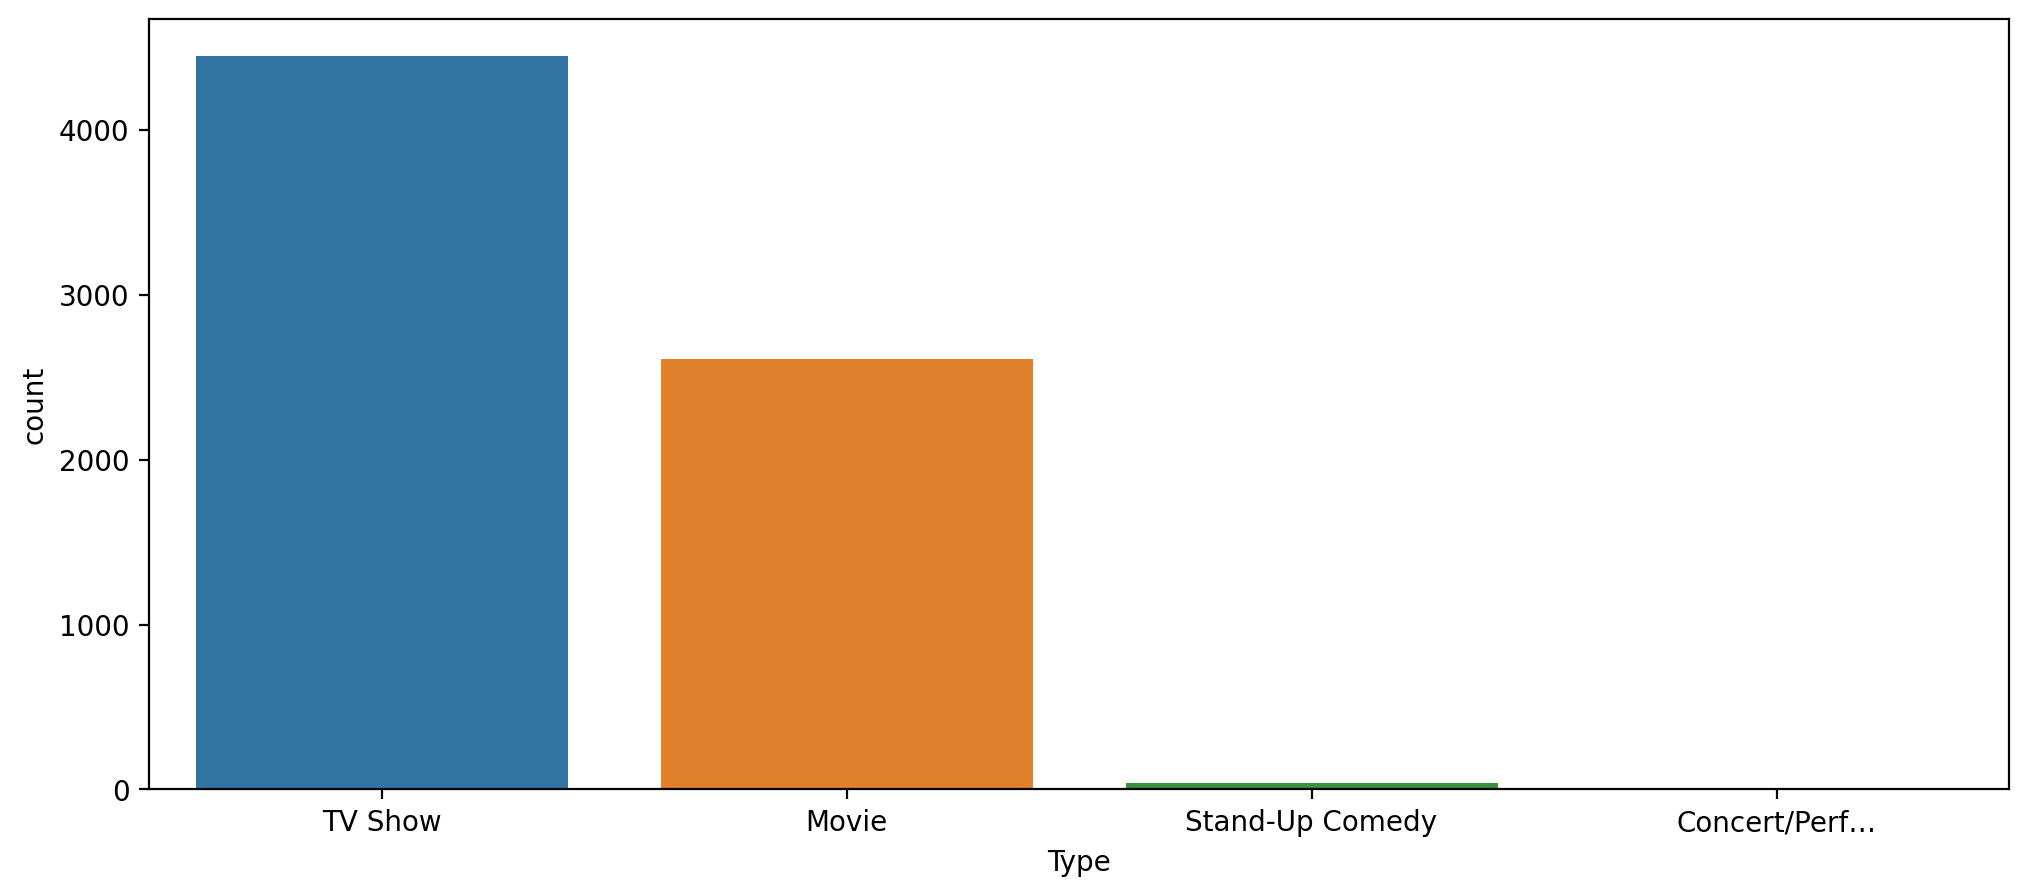

In [13]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Type',data=netflix) #count type of shows in  netflix and TV shows count is high

<Axes: xlabel='Type', ylabel='count'>

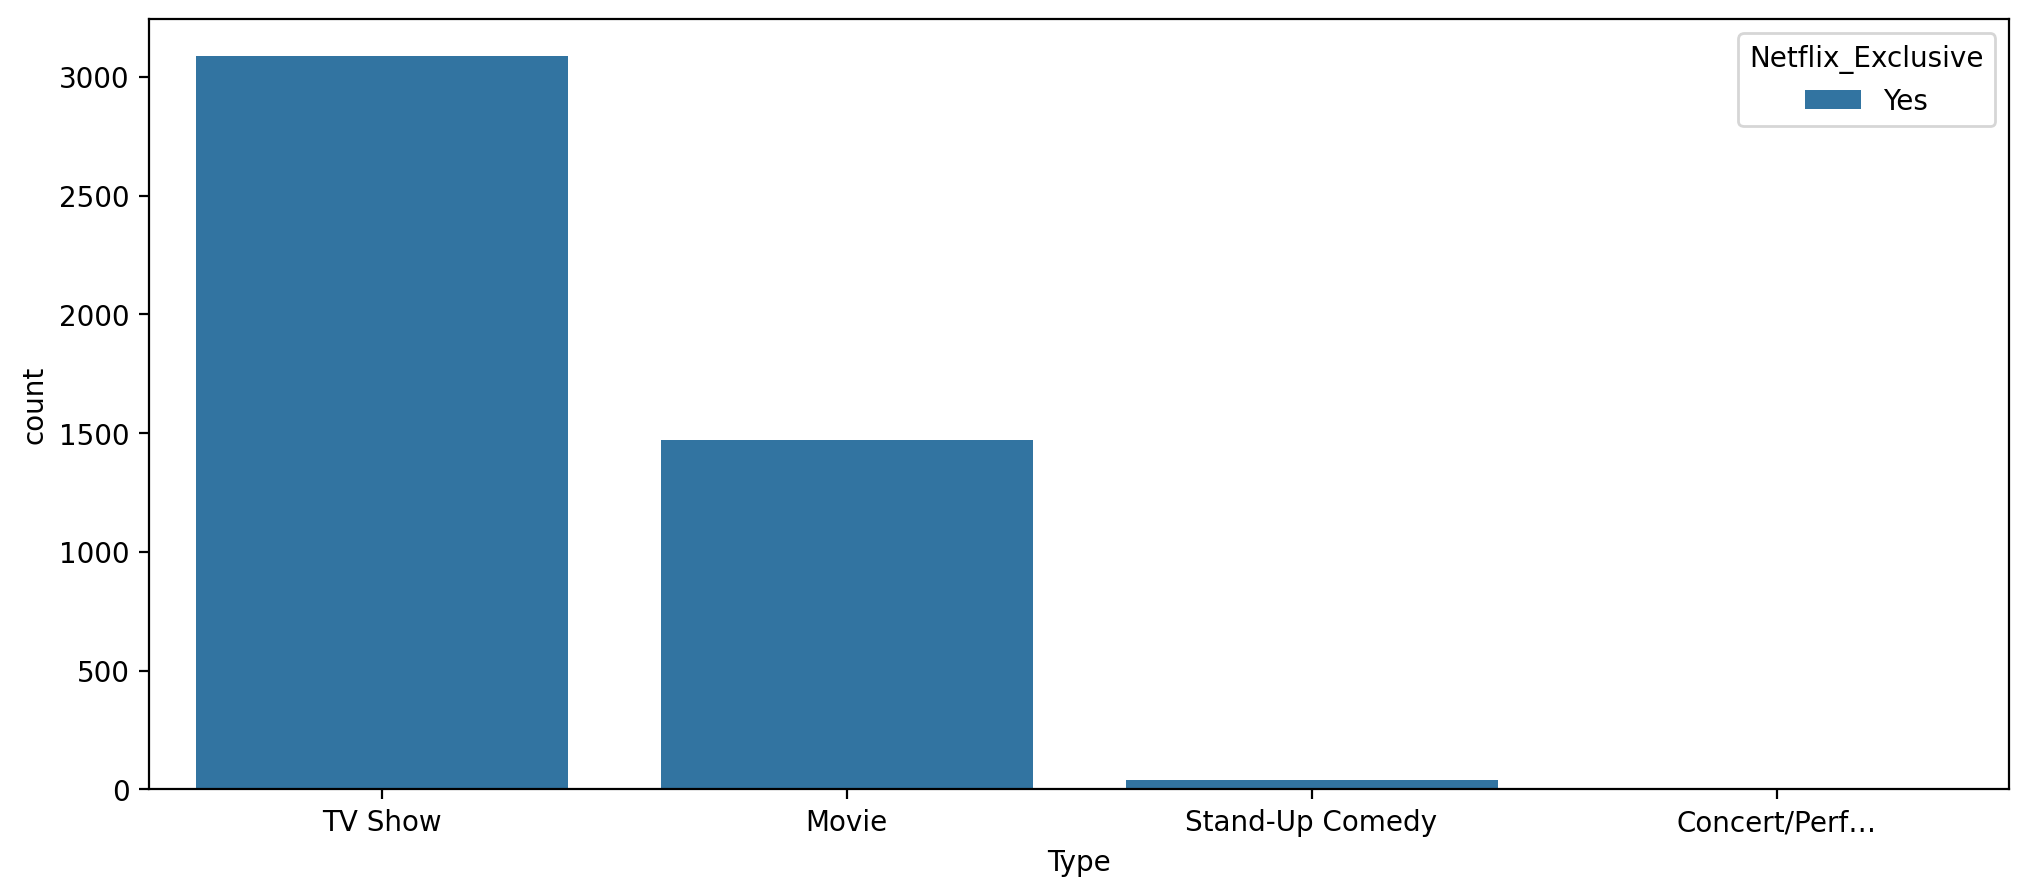

In [14]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Type', hue='Netflix_Exclusive',data=netflix)

In [15]:
# Netflix exclusive, Tv shows is more than other type

<Axes: xlabel='Type', ylabel='Viewership_Score'>

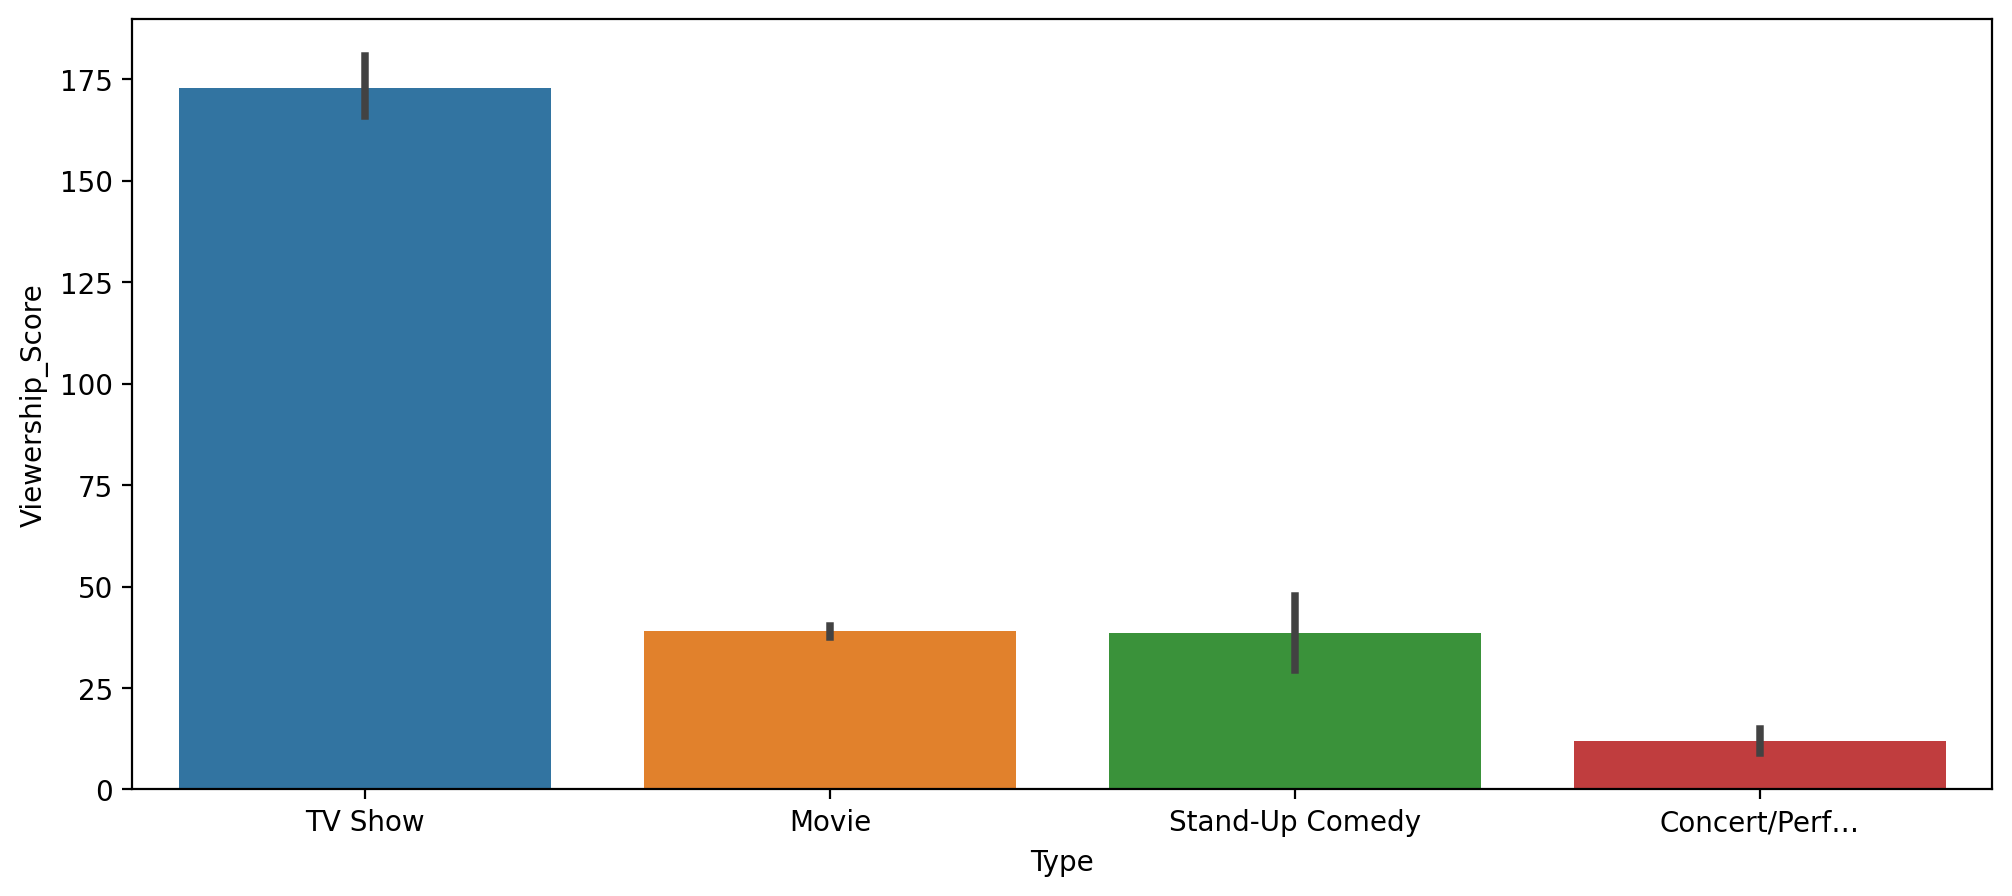

In [16]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Type',y='Viewership_Score',data=netflix)

In [17]:
#Tv show has highest viewership score 

<Axes: xlabel='Type', ylabel='Rank'>

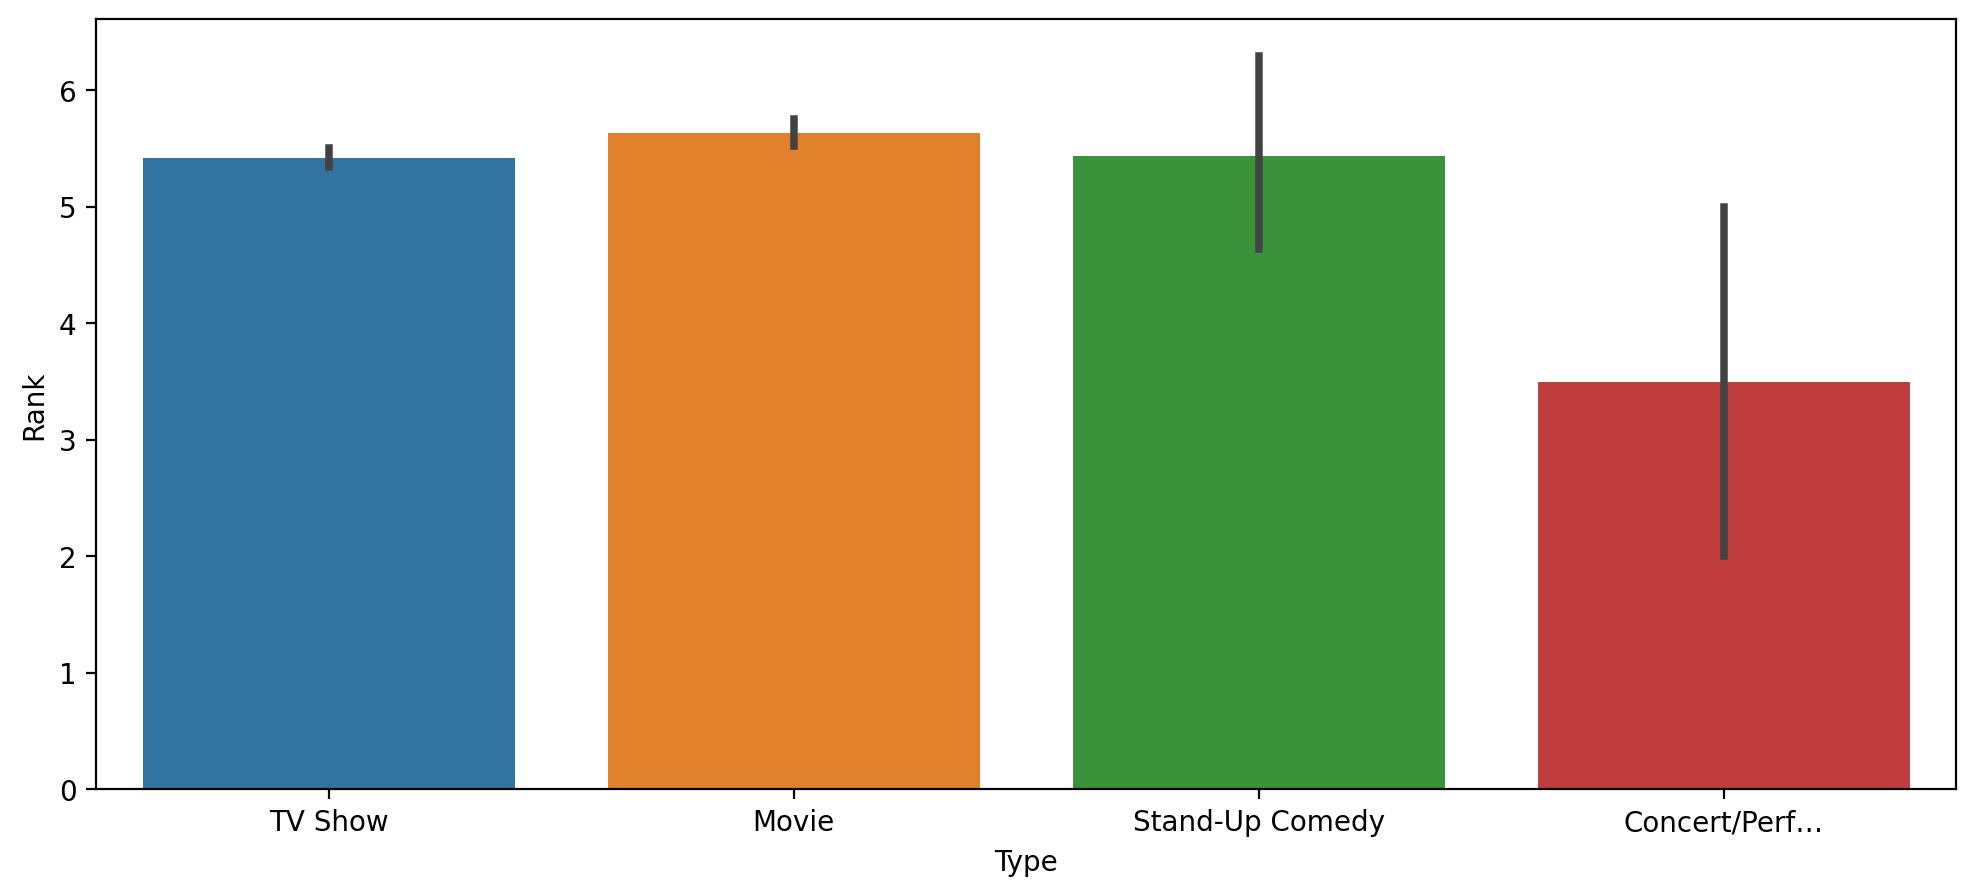

In [18]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Type',y='Rank',data=netflix)

In [19]:
#Movie has higher ranking in netflix

<Axes: xlabel='Rank', ylabel='Viewership_Score'>

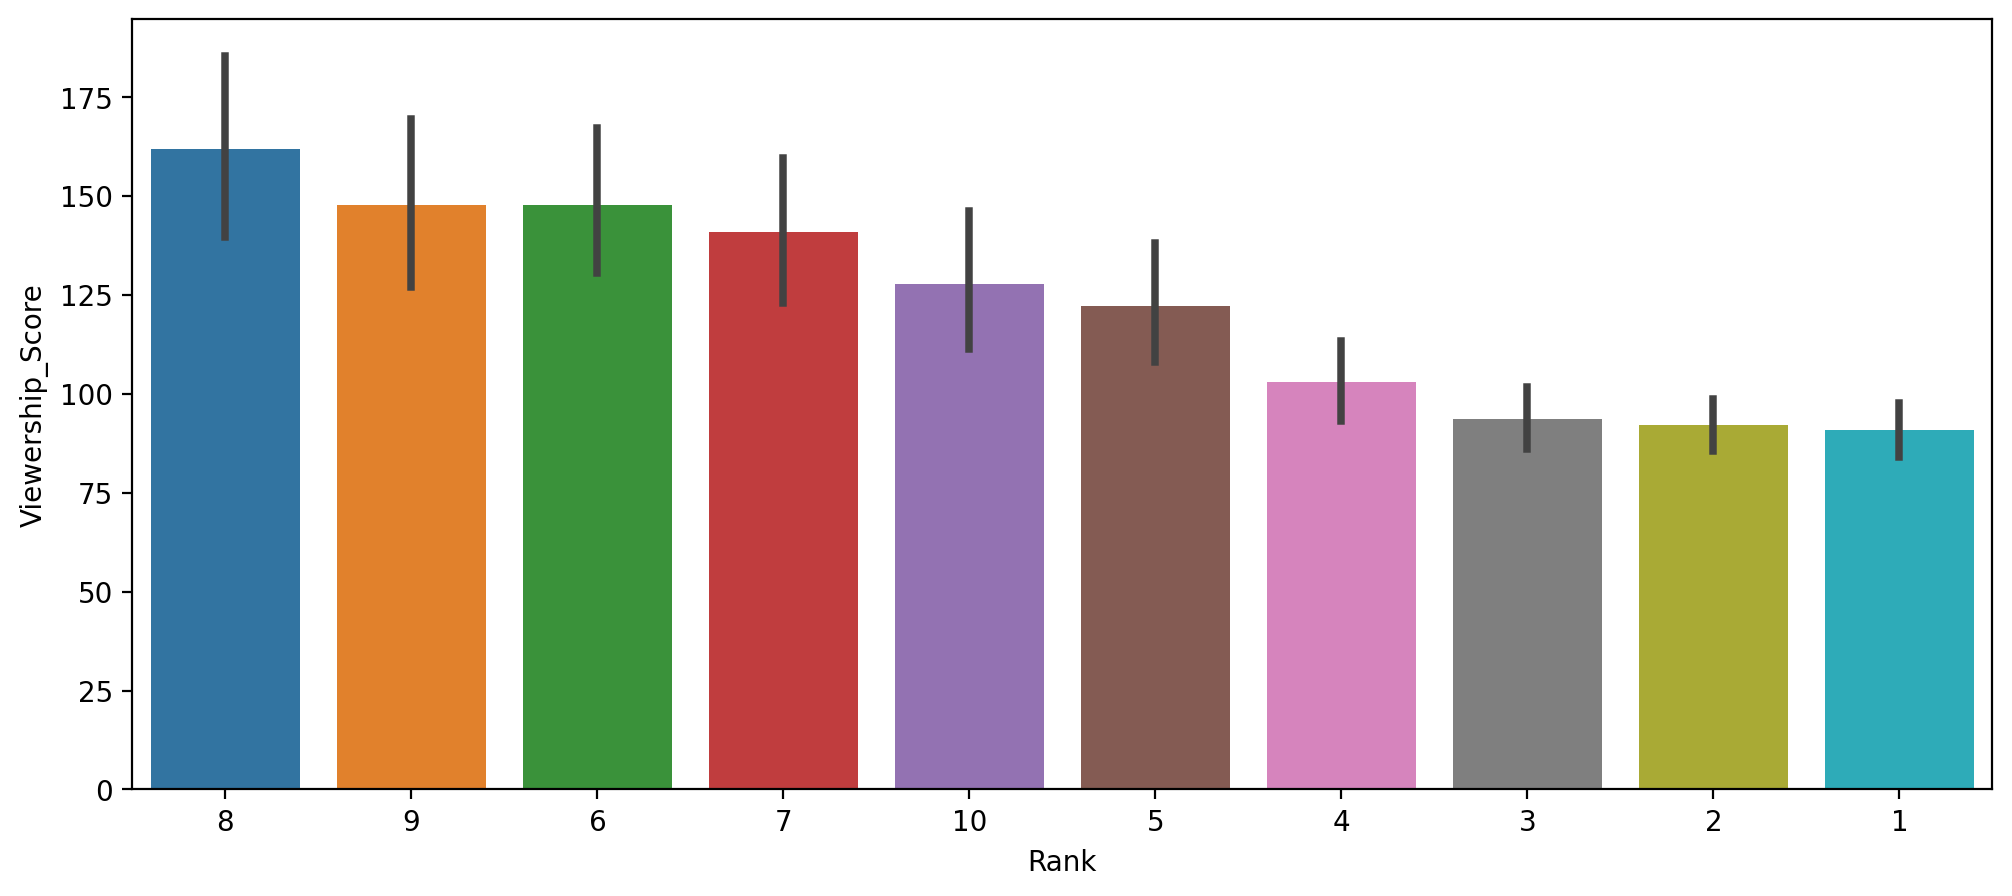

In [20]:
desc_order=netflix.groupby('Rank')['Viewership_Score'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Rank',y='Viewership_Score',data=netflix,order=desc_order)

In [ ]:
#viewershipScores arranged in descending order  and highest viewership score not more than 170,And score was not affecting rank as well

<Axes: xlabel='Rank', ylabel='Viewership_Score'>

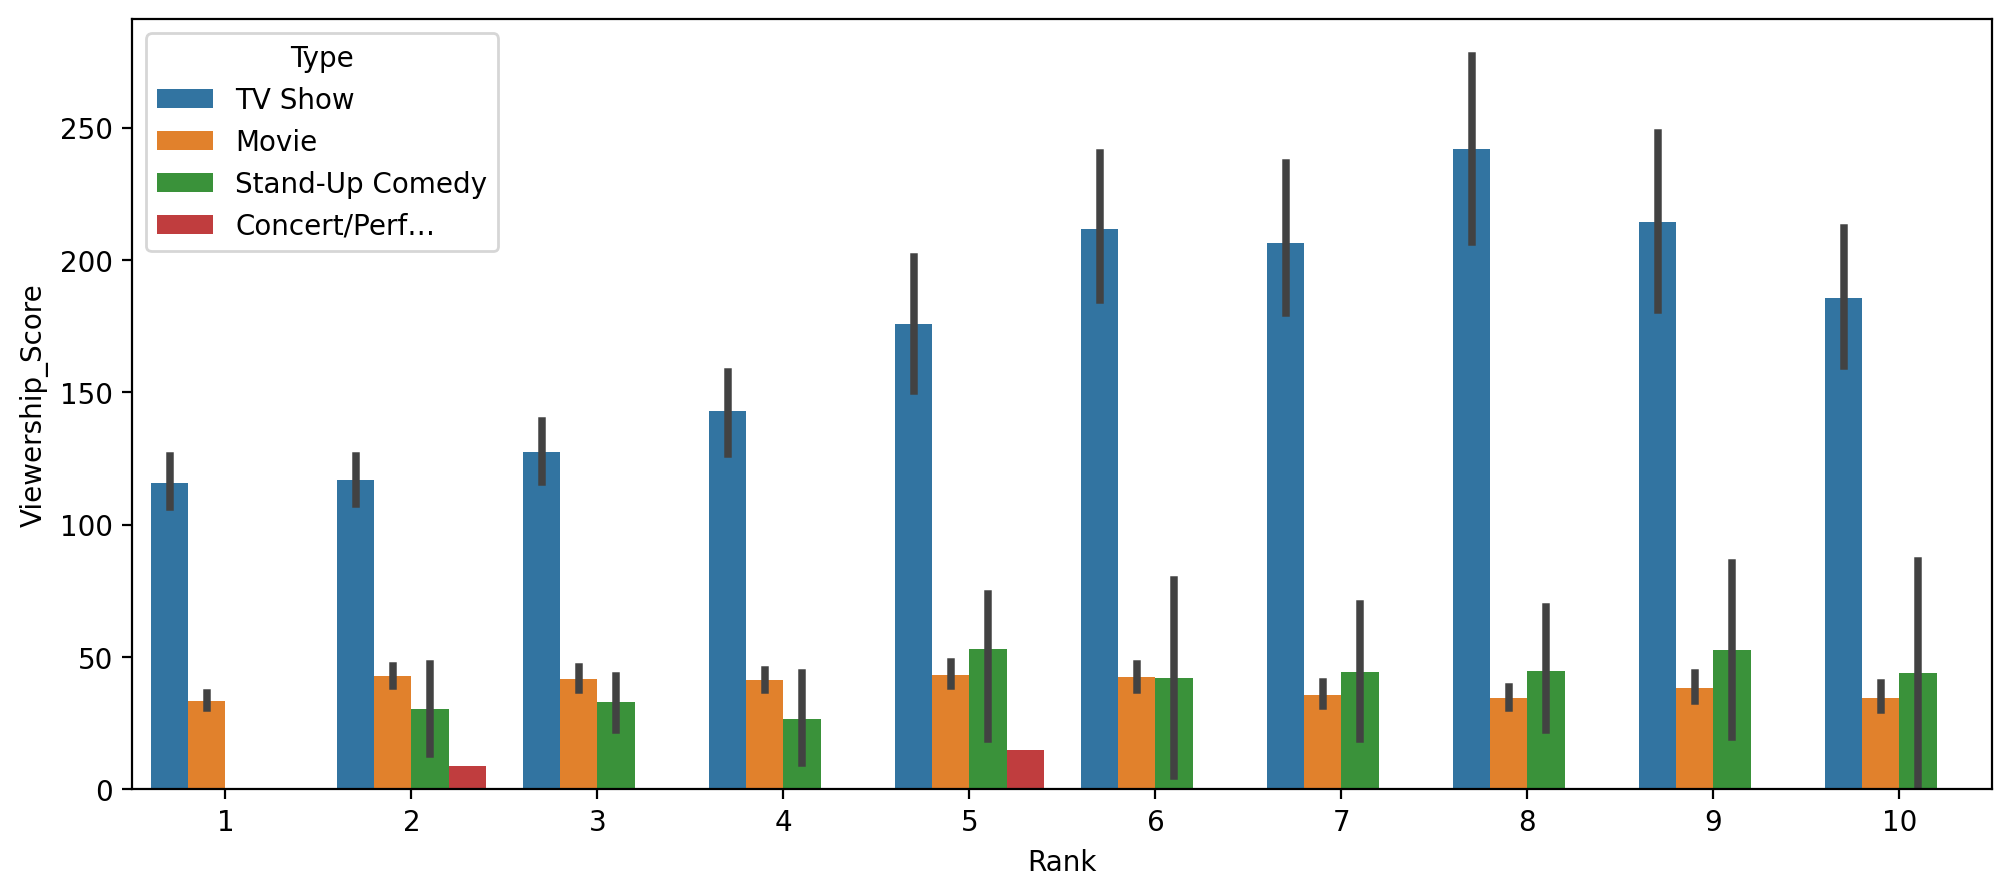

In [67]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Rank',y='Viewership_Score',data=netflix,hue='Type')

In [ ]:
#TV show has highest netflix viewership score than other types 

<Axes: xlabel='Last_Week_Rank', ylabel='Rank'>

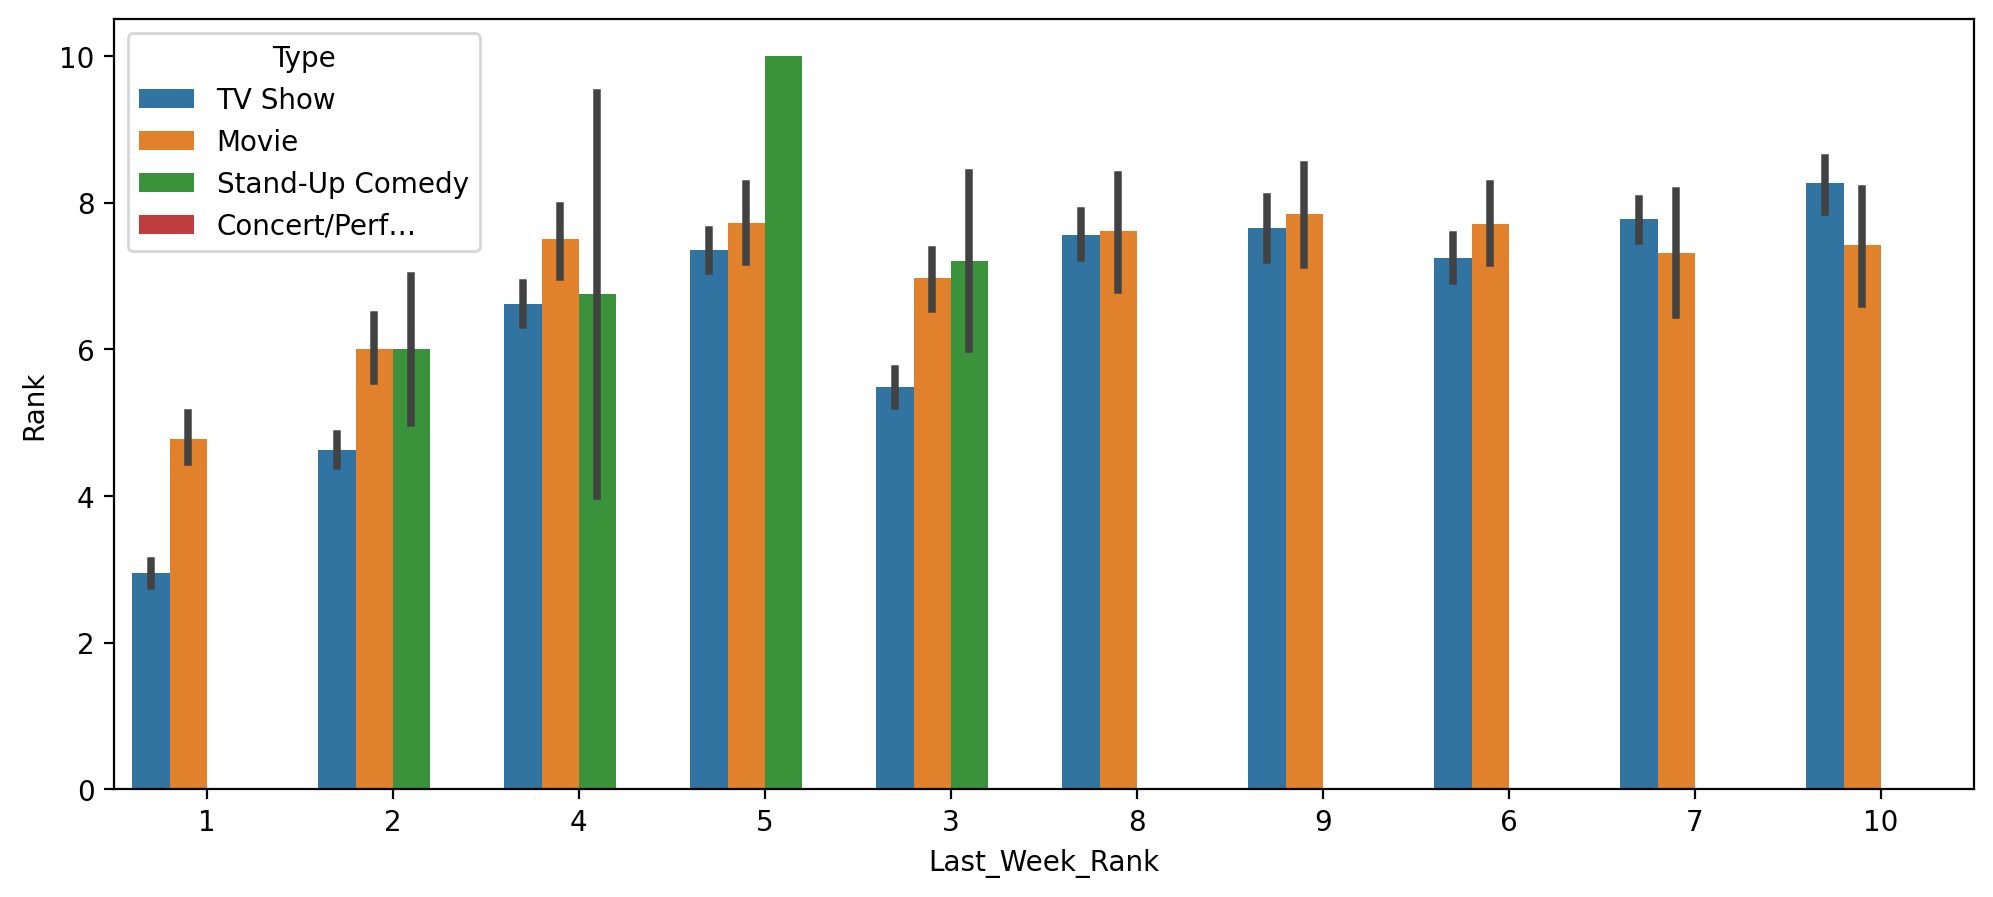

In [93]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Last_Week_Rank',y='Rank',data=netflix,hue='Type')

In [ ]:
#Rank was not same from last week 

<Axes: xlabel='Year_to_Date_Rank', ylabel='Rank'>

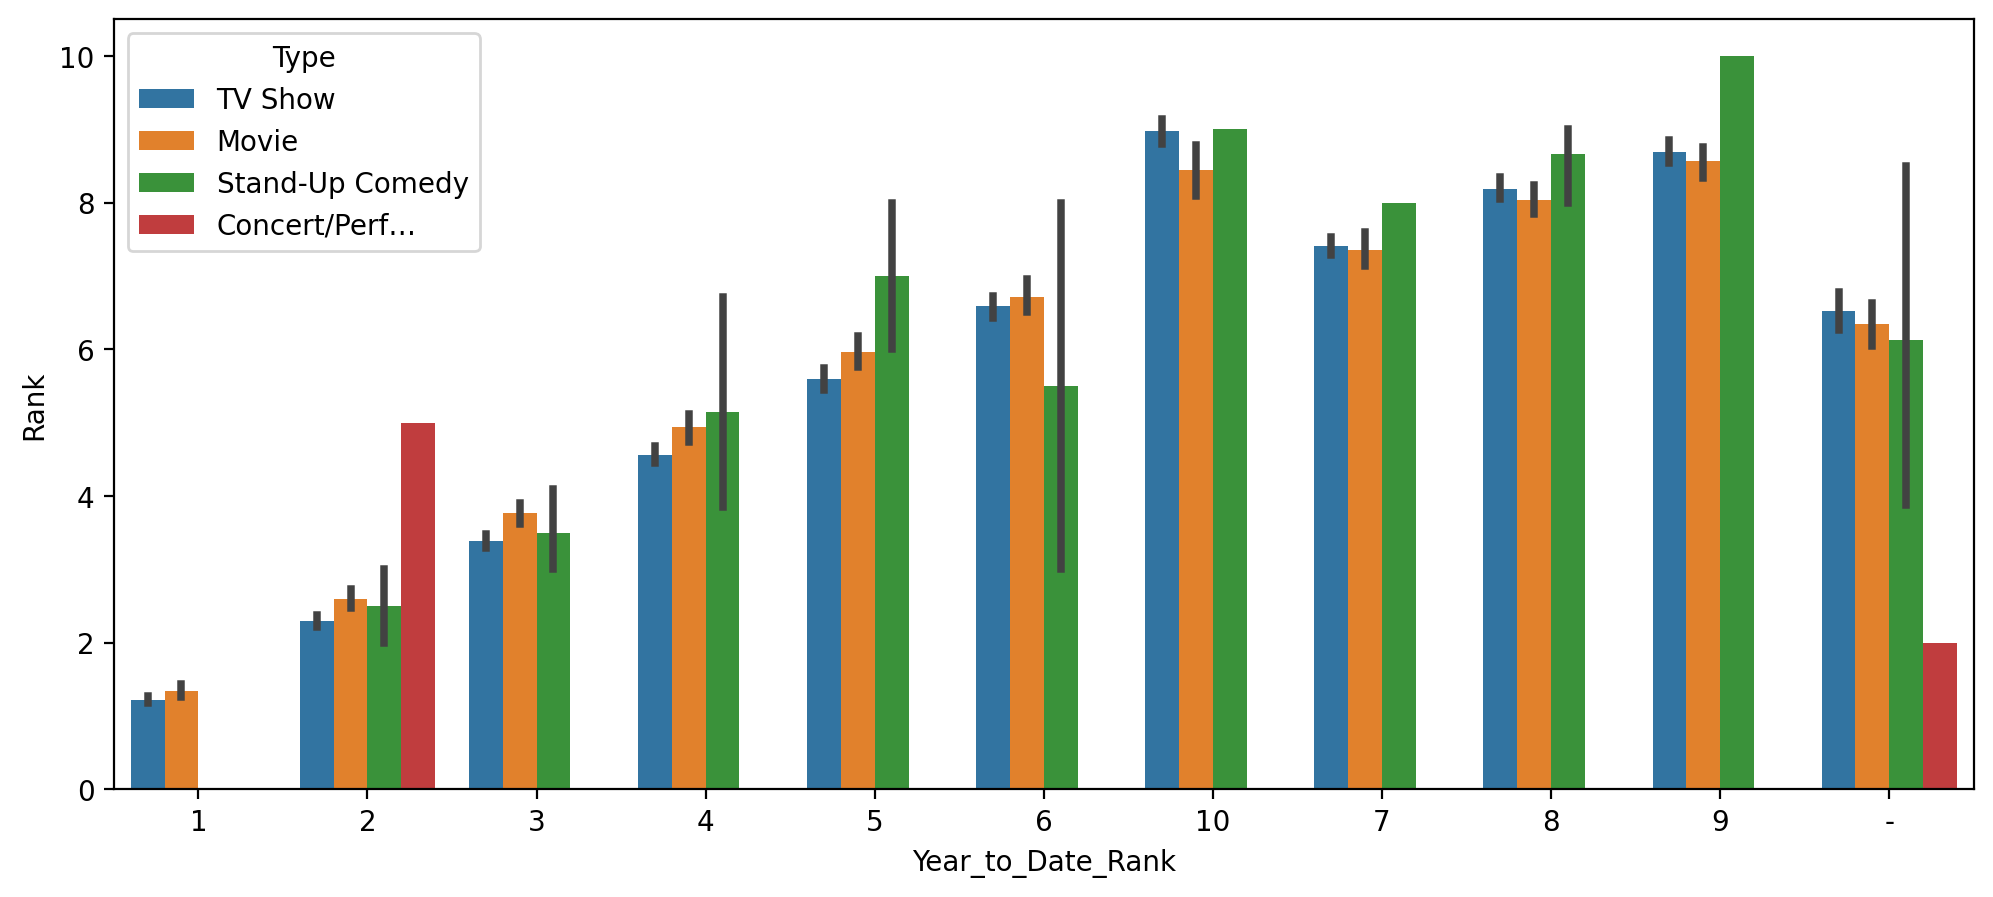

In [79]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Year_to_Date_Rank',y='Rank',data=netflix,hue='Type')

In [21]:
#Year-to-date rank and  rank is almost similar 

<Axes: xlabel='Netflix_Exclusive', ylabel='Days_In_Top_10'>

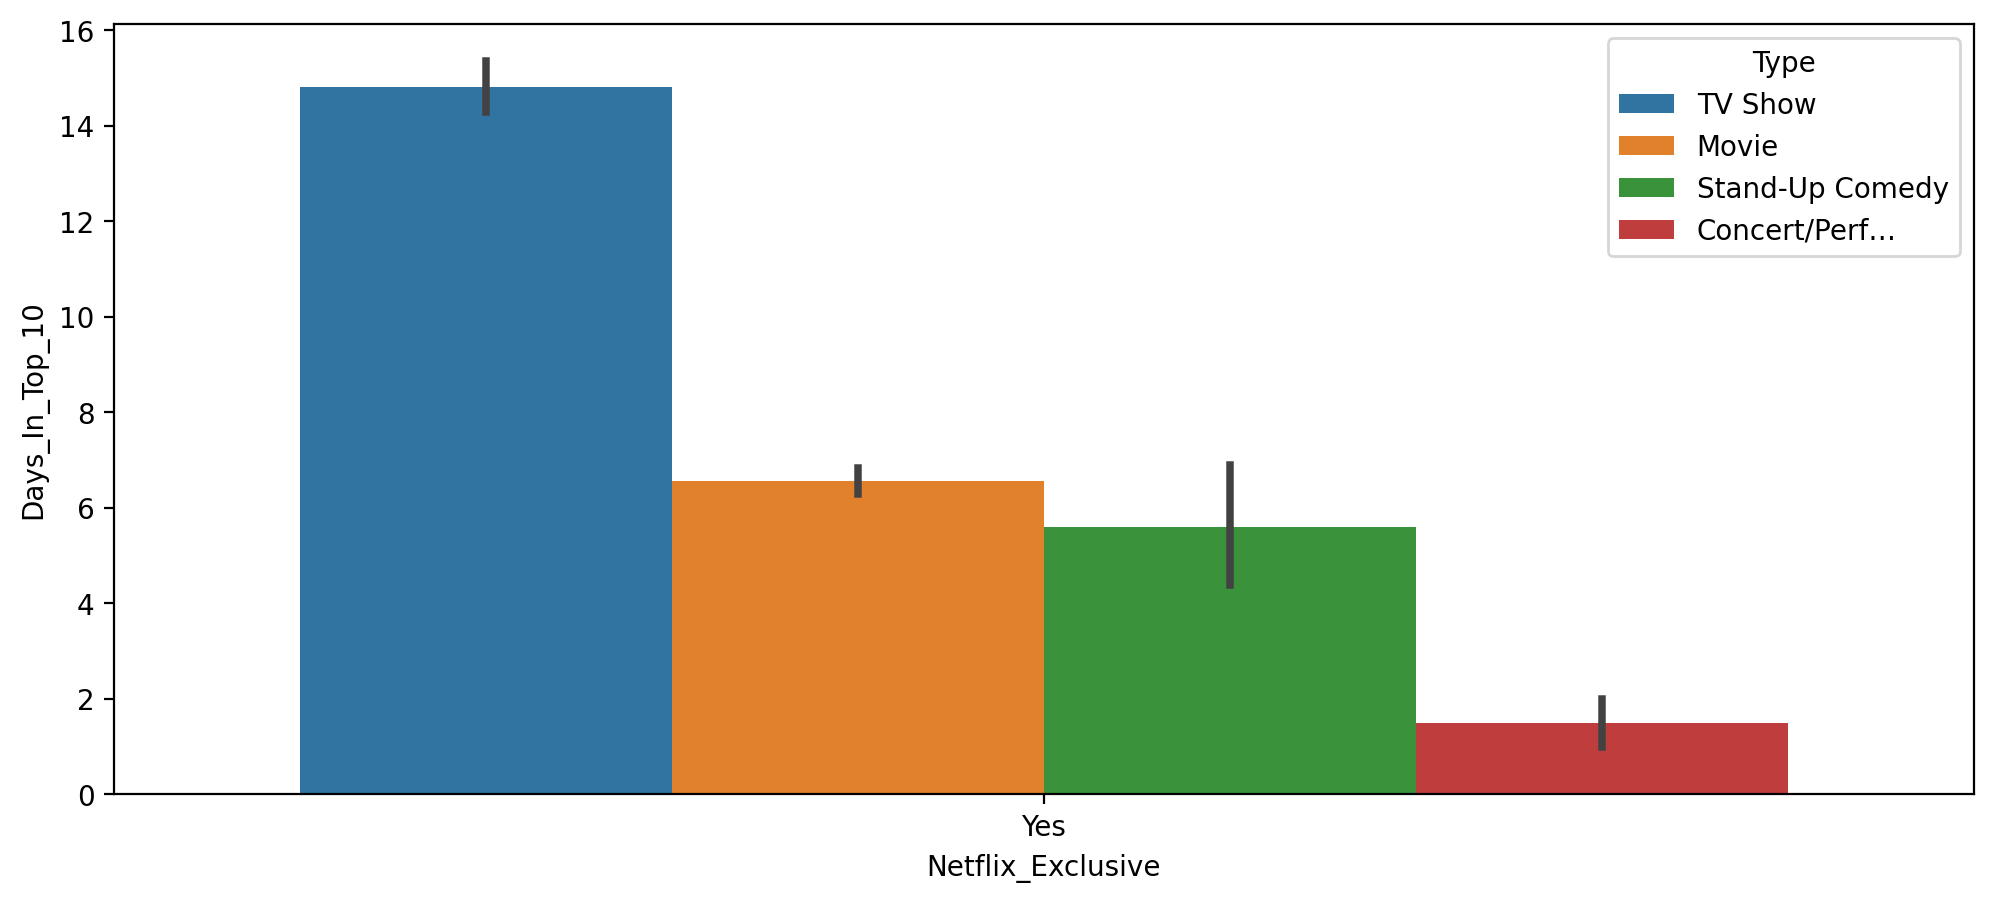

In [22]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Netflix_Exclusive',y='Days_In_Top_10',data=netflix,hue='Type')

In [23]:
#Netflix exclusive tv shows stay longer days in top 10 

<Axes: xlabel='Netflix_Exclusive', ylabel='Viewership_Score'>

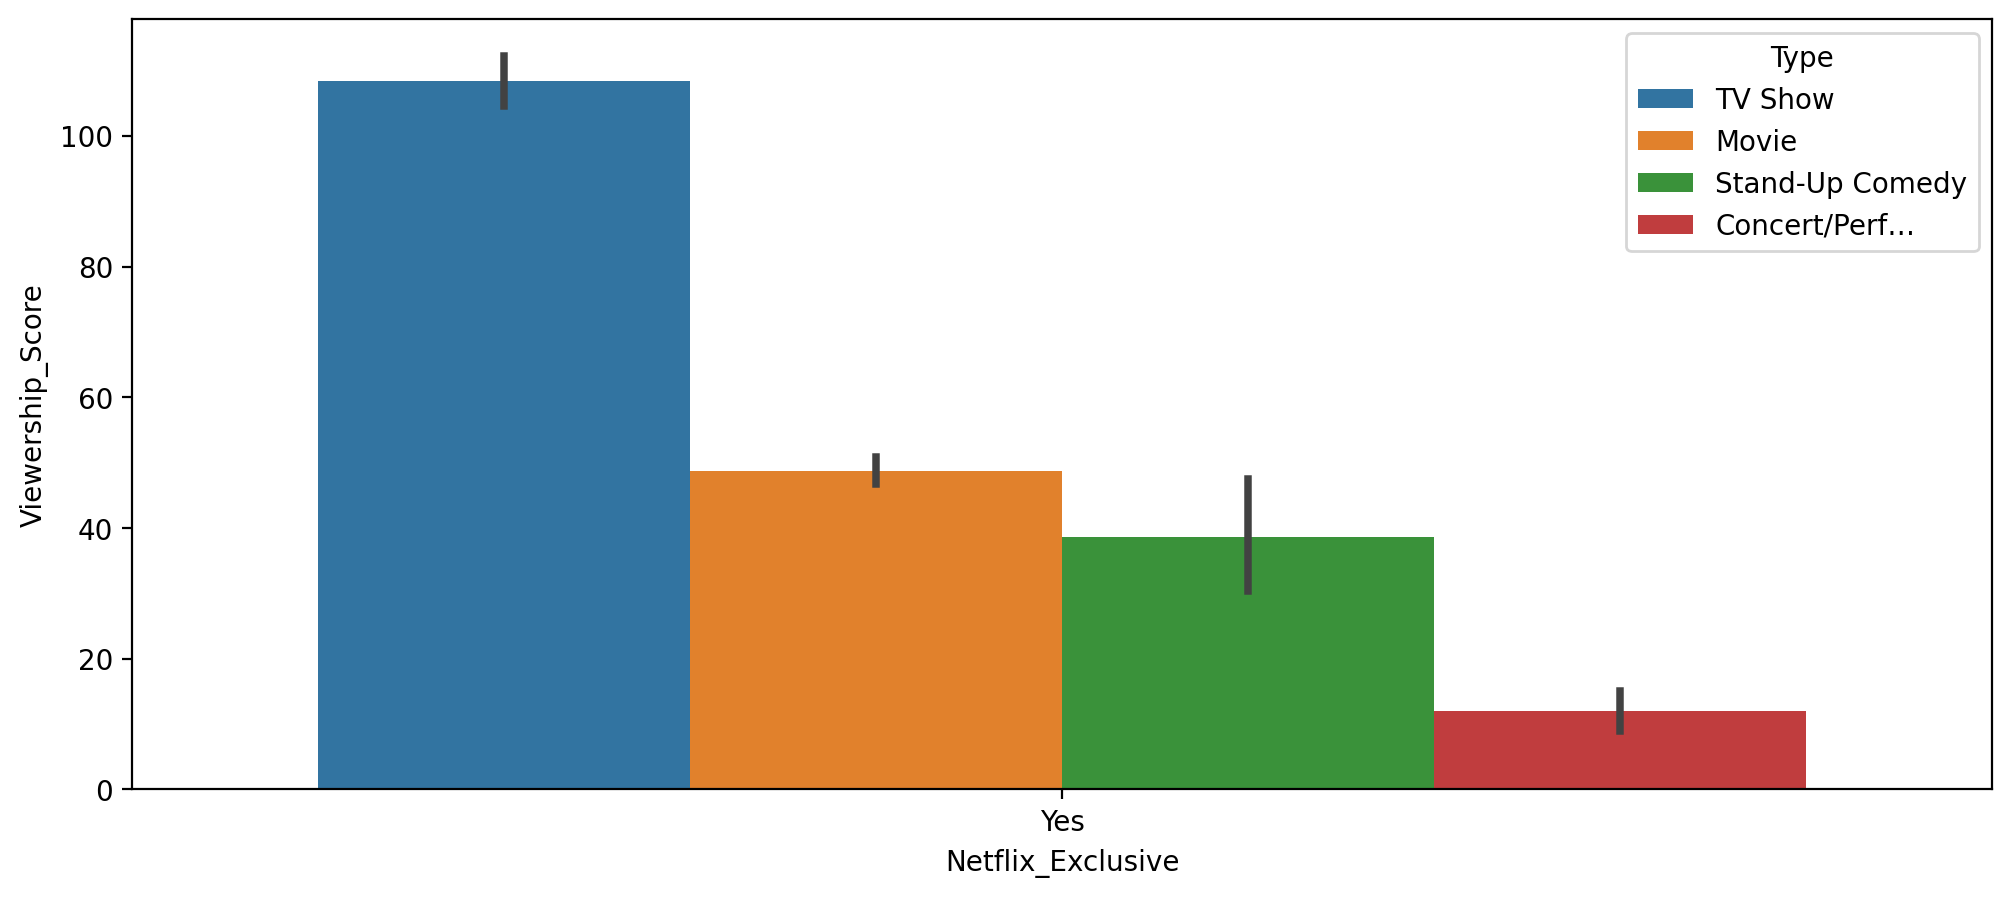

In [24]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Netflix_Exclusive',y='Viewership_Score',data=netflix,hue='Type')

In [25]:
#Netflix exclusive tv shows have higher viewership score  

<Axes: xlabel='Last_Week_Rank', ylabel='Viewership_Score'>

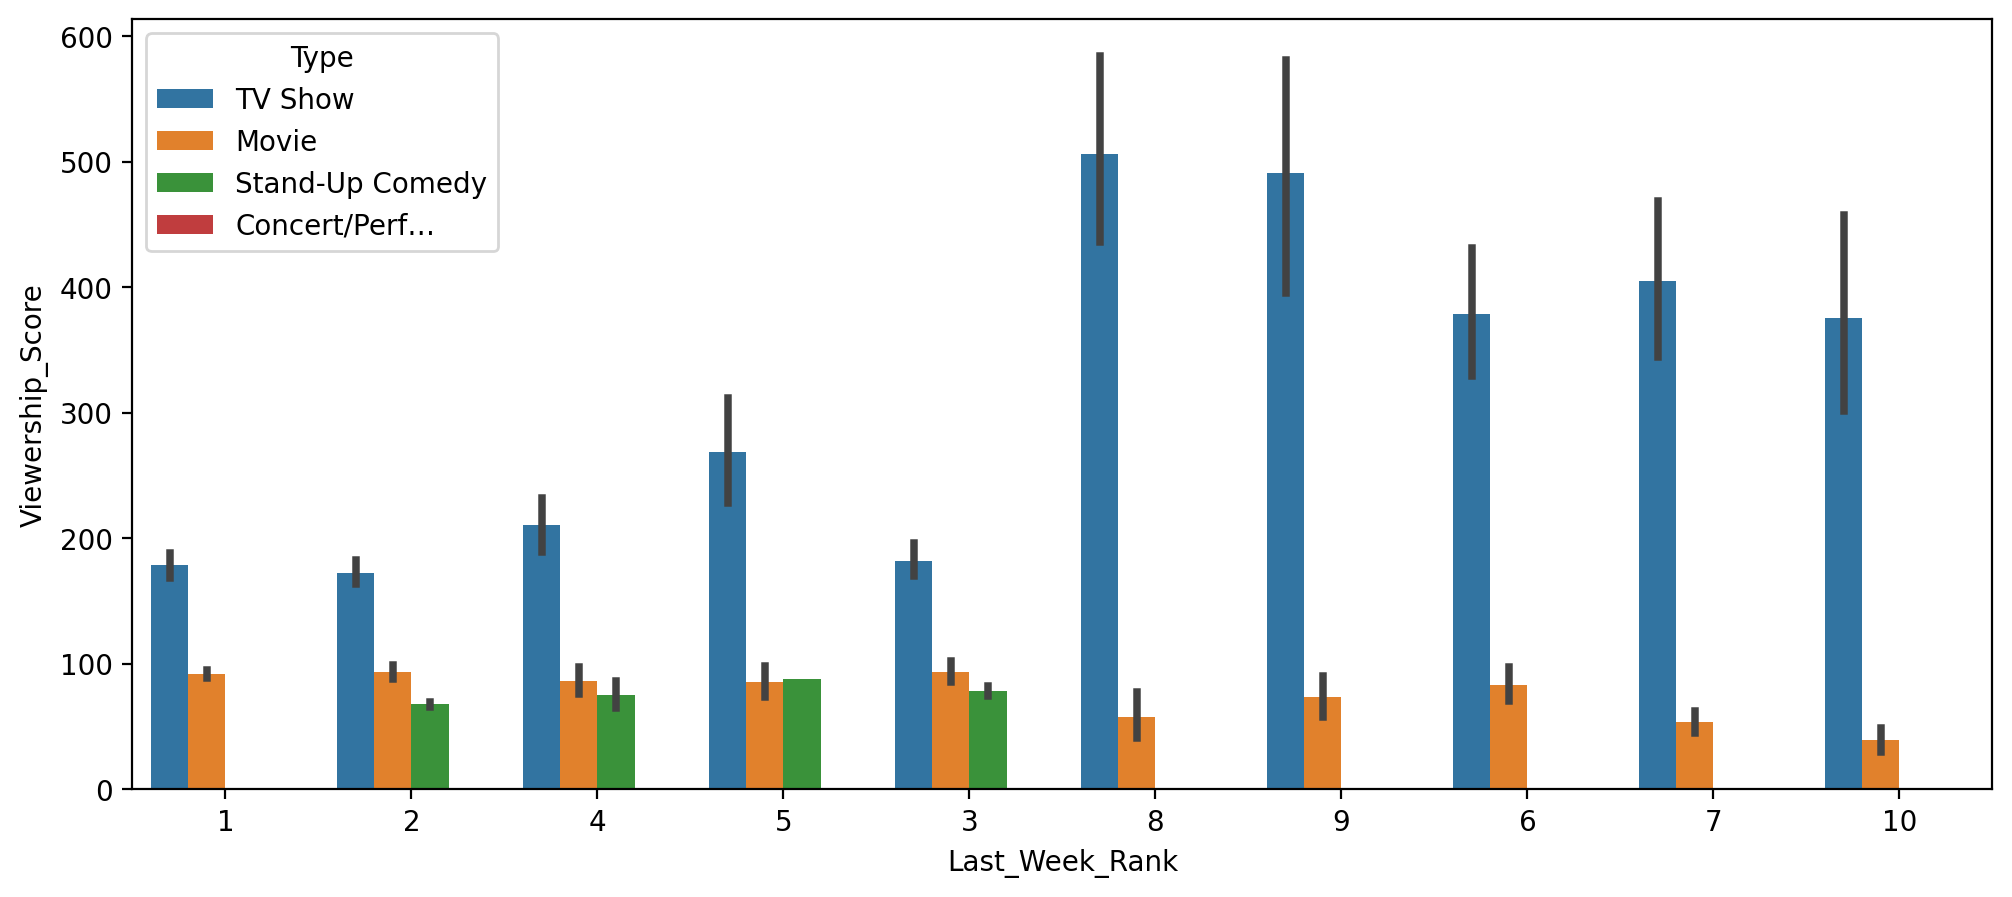

In [26]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x='Last_Week_Rank',y='Viewership_Score',data=netflix,hue='Type')

In [27]:
#Based on last week rank also,tv has higher viewership-score

In [ ]:
#conclusion:In netflix  ,Tv shows count is more so it hasve more viewership score and neflix exclusive tv show stay more days in top10 